# Engagement Test


## Goal


Many sites make money by selling ads. For these sites, the number of pages visited by users on each session is one of the most metric, if not the most important metric.

Data science plays a huge role here, especially by building models to suggest personalized content. In order to check if the model is actually improving engagement, companies then run A/B tests.

It is often data scientist responsibility to also analyze test data and understand whether the model has been successful. The goal of this project is to analyze A/B test results and draw conclusions.


## Challenge Description


The company of this exercise is a social network. They decided to add a feature called: Recommended Friends, i.e. they suggest you people you may know.

A data scientist has built a model to suggest 5 people to each user. These potential friends will be shown on the user newsfeed. At first, the model is tested just on a subset of users to see how it performs compared to the newsfeed without the new feature.

The test has been running for some time and your boss asks you to check the results. You are asked to check, for each user, the number of pages visited during their first session since the test started. If this number increased, the test is a success.

Specifically, your boss wants to know:

- Is the test winning? That is, should 100% of the users see the Recommended Friends feature?

- Is the test performing similarly for all user segments or are there differences among different segments?

- If you identified segments that responded differently to the test, can you guess the reason? Would this change your conclusions?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
ls

17_Engagement_Test.ipynb  test_table.csv            user_table.csv


In [3]:
df_user = pd.read_csv('user_table.csv')
print(df_user.shape)
df_user.head()

(100000, 2)


,user_id,signup_date
0,34,2015-01-01
1,59,2015-01-01
2,178,2015-01-01
3,285,2015-01-01
4,383,2015-01-01


- user_id : the Id of the user. It is unique by user and can be joined to user id in the other table
- signup_date : when the user joined the social network

In [4]:
df_test = pd.read_csv('test_table.csv')
print(df_test.shape)
df_test.head()

(100000, 5)


,user_id,date,browser,test,pages_visited
0,600597,2015-08-13,IE,0,2
1,4410028,2015-08-26,Chrome,1,5
2,6004777,2015-08-17,Chrome,0,8
3,5990330,2015-08-27,Safari,0,8
4,3622310,2015-08-07,Firefox,0,1


- user_id : the Id of the user
- date : the date of the first session since the test started
- browser : user browser during that session
- test: 1 if the user saw the new feature, 0 otherwise
- pages_visited: the metric we care about. # of pages visited in that session

In [5]:
df = pd.merge(df_test, df_user, how = 'left', on ='user_id')
df.head(10)

,user_id,date,browser,test,pages_visited,signup_date
0,600597,2015-08-13,IE,0,2,2015-01-19
1,4410028,2015-08-26,Chrome,1,5,2015-05-11
2,6004777,2015-08-17,Chrome,0,8,2015-06-26
3,5990330,2015-08-27,Safari,0,8,2015-06-25
4,3622310,2015-08-07,Firefox,0,1,2015-04-17
5,1806423,2015-08-28,IE,0,5,2015-02-22
6,5177398,2015-08-14,Chrome,1,5,2015-06-02
7,2494813,2015-08-19,Chrome,0,10,2015-03-15
8,6377383,2015-08-20,Chrome,1,1,2015-07-07
9,1462493,2015-08-10,Firefox,1,7,2015-02-12


In [6]:
df.isnull().sum()

user_id          0
date             0
browser          0
test             0
pages_visited    0
signup_date      0
dtype: int64

In [7]:
df.dtypes

user_id           int64
date             object
browser          object
test              int64
pages_visited     int64
signup_date      object
dtype: object

In [8]:
df.date = pd.to_datetime(df.date)
df.signup_date = pd.to_datetime(df.signup_date)

In [9]:
df.dtypes

user_id                   int64
date             datetime64[ns]
browser                  object
test                      int64
pages_visited             int64
signup_date      datetime64[ns]
dtype: object

## Question I 

Is the test winning? That is, should 100% of the users see the Recommended Friends feature?

In [10]:
df[df.test==0].describe()

,user_id,test,pages_visited
count,4.984600e+04,49846.0,49846.000000
mean,4.513768e+06,0.0,4.608394
std,2.597193e+06,0.0,2.706938
min,3.400000e+01,0.0,1.000000
25%,2.268879e+06,0.0,2.000000
50%,4.526761e+06,0.0,4.000000
75%,6.760280e+06,0.0,6.000000
max,8.999550e+06,0.0,17.000000


In [11]:
df[df.test==1].describe()

,user_id,test,pages_visited
count,5.015400e+04,50154.0,50154.000000
mean,4.510162e+06,1.0,4.599693
std,2.596780e+06,0.0,2.204697
min,5.900000e+01,1.0,0.000000
25%,2.272461e+06,1.0,3.000000
50%,4.509972e+06,1.0,5.000000
75%,6.769696e+06,1.0,6.000000
max,8.999849e+06,1.0,16.000000


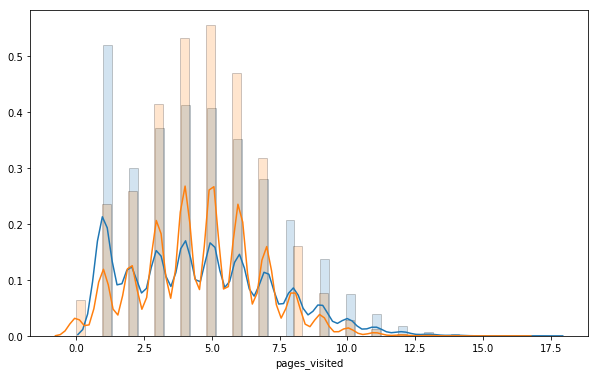

In [12]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df[df.test == 0].pages_visited, hist_kws = hist_kws, ax = ax)
sns.distplot(df[df.test == 1].pages_visited, hist_kws = hist_kws, ax = ax)
plt.show()

In [13]:
control = df[df.test == 0].pages_visited
test = df[df.test == 1].pages_visited

stat,pvalue = stats.ttest_ind(test, control, equal_var=False)
print(control.mean(),test.mean(),pvalue)

4.608393853067447 4.599692945727161 0.5774523171559118


P-value is 0.577, so the null hypothesis cannot be rejected. I cannot see significant difference between test and control groups. Let me try something else:

In [14]:
control = df[(df.test == 0) & (df.pages_visited >=1)].pages_visited
test = df[(df.test == 1) & (df.pages_visited >=1)].pages_visited

stat,pvalue = stats.ttest_ind(test, control, equal_var=False)
print(control.mean(),test.mean(),pvalue)

4.608393853067447 4.694989417127971 2.113476883147653e-08


From the above distribution figure and the constraint df.pages_visited >=1 the two groups are different. The reason is that there are many (df.test == 1) & (df.pages_visited == 0) but no (df.test == 0) & (df.pages_visited == 0).

## Question II

Is the test performing similarly for all user segments or are there differences among different segments?

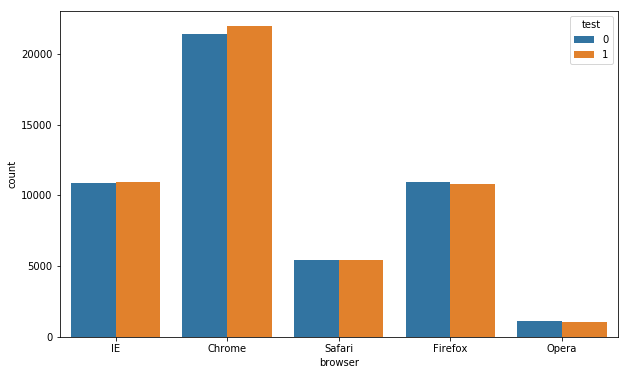

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x=df.browser, hue = df.test)
plt.show()

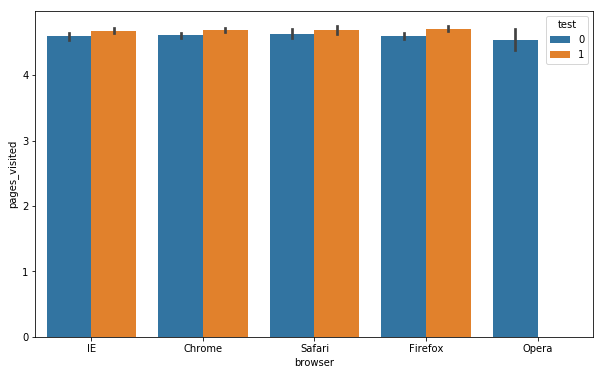

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=df.browser, y=df.pages_visited, hue = df.test)
plt.show()

Opera looks weird. Double check again:

In [17]:
df.pages_visited[(df.browser == 'Opera') & (df.test ==1)].value_counts()

0    1018
Name: pages_visited, dtype: int64

So I would like to remove Opera to check again.

In [18]:
df2 = df[(df.browser != 'Opera')]

control = df2[df2.test == 0].pages_visited
test = df2[df2.test == 1].pages_visited

stat,pvalue = stats.ttest_ind(test, control, equal_var=False)
print(control.mean(),test.mean(),pvalue)

4.609803639945011 4.694989417127971 4.403954129457701e-08


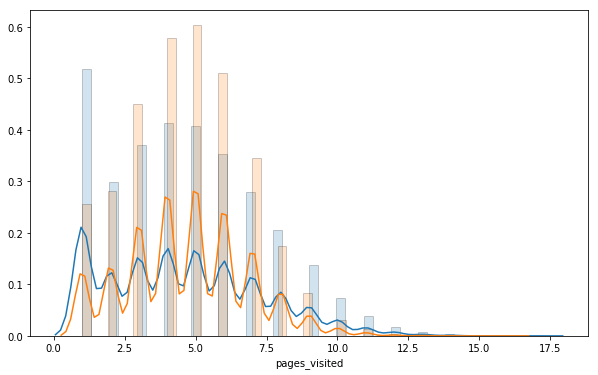

In [19]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df2[df2.test == 0].pages_visited, hist_kws = hist_kws, ax = ax)
sns.distplot(df2[df2.test == 1].pages_visited, hist_kws = hist_kws, ax = ax)
plt.show()

A/B testing shows that test group has higher mean value. 